# 多变量线性回归

ex1data2还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
path = "ex1data2.txt"
data = pd.read_csv(path,header=None,names=["Size","Bedrooms_Numbers","Prize"])
data.head()

,Size,Bedrooms_Numbers,Prize
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [230]:
print(np.ptp(data,axis=0))

Size                  3626
Bedrooms_Numbers         4
Prize               530000
dtype: int64


量级相差很大，需要进行预处理-特征归一化、特征缩放

In [231]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms_Numbers,Prize
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [232]:
data.insert(0,"ones",1)
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [233]:
x.head()

,ones,Size,Bedrooms_Numbers
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [234]:
y.head()

,Prize
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [235]:
# 初始化x
X = np.matrix(x.values)
# 初始化y
y = np.matrix(y.values)
# 初始化theta
theta = np.zeros(X.shape[1])
theta = np.matrix(theta)

In [236]:
print(X)
print(y)
print(theta)

[[ 1.00000000e+00  1.30009869e-01 -2.23675187e-01]
 [ 1.00000000e+00 -5.04189838e-01 -2.23675187e-01]
 [ 1.00000000e+00  5.02476364e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.35723065e-01 -1.53776691e+00]
 [ 1.00000000e+00  1.25747602e+00  1.09041654e+00]
 [ 1.00000000e+00 -1.97317285e-02  1.09041654e+00]
 [ 1.00000000e+00 -5.87239800e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.21881404e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.81023044e-01 -2.23675187e-01]
 [ 1.00000000e+00 -6.37573110e-01 -2.23675187e-01]
 [ 1.00000000e+00 -7.63567023e-02  1.09041654e+00]
 [ 1.00000000e+00 -8.56737193e-04 -2.23675187e-01]
 [ 1.00000000e+00 -1.39273340e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.11729182e+00  2.40450826e+00]
 [ 1.00000000e+00 -9.21956312e-01 -2.23675187e-01]
 [ 1.00000000e+00  3.76643089e-01  1.09041654e+00]
 [ 1.00000000e+00 -8.56523009e-01 -1.53776691e+00]
 [ 1.00000000e+00 -9.62222960e-01 -2.23675187e-01]
 [ 1.00000000e+00  7.65467909e-01  1.09041654e+00]
 [ 1.00000000e+00  1.29648433e+

In [237]:
def compute_cost(X,y,theta):
    err = X * theta.T - y
    cost = np.sum(np.power(err,2)) / (2 * len(X))
    return cost

In [238]:
def gradient_descent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - (alpha / len(X)) * np.sum(term)
        theta = temp
        cost[i] = compute_cost(X,y,theta)
    return theta,cost


初始化$\alpha$以及iters

In [239]:
alpha = 0.01
iters = 1000

In [240]:
g,cost = gradient_descent(X,y,theta,alpha,iters)
g

matrix([[-1.10868761e-16,  8.78503652e-01, -4.69166570e-02]])

In [241]:
compute_cost(X,y,g)

0.13070336960771892

In [251]:
data_real = pd.read_csv(path,header=None,names=["Size","Bedrooms_Numbers","Prize"])
pre = X * g.T
print(pre.astype)

<built-in method astype of matrix object at 0x00000233301B56D0>


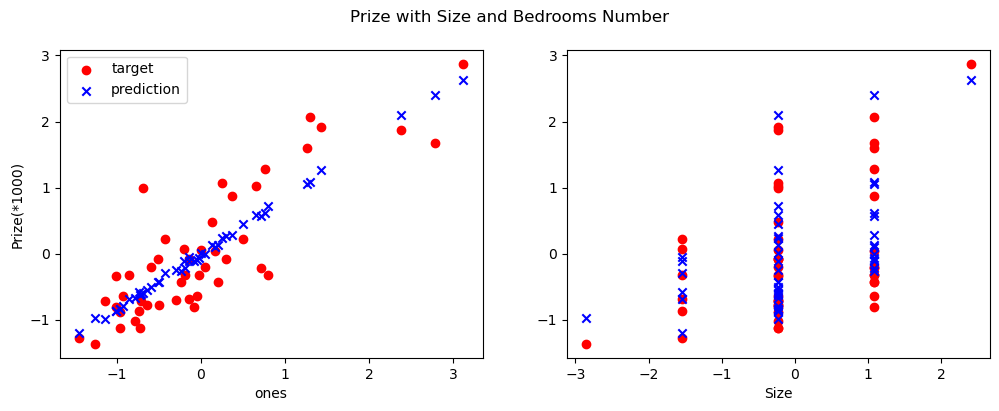

In [256]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
for i in range(2):
    ax[i].scatter(data.iloc[:,i + 1],data["Prize"] ,color="r",label="target")
    ax[i].scatter(data.iloc[:,i + 1],pre.A,color='blue',label="prediction",marker="x")
    ax[i].set_xlabel(data.columns[i])
ax[0].set_ylabel("Prize(*1000)")
ax[0].legend(loc="best")
fig.suptitle("Prize with Size and Bedrooms Number")
plt.show()

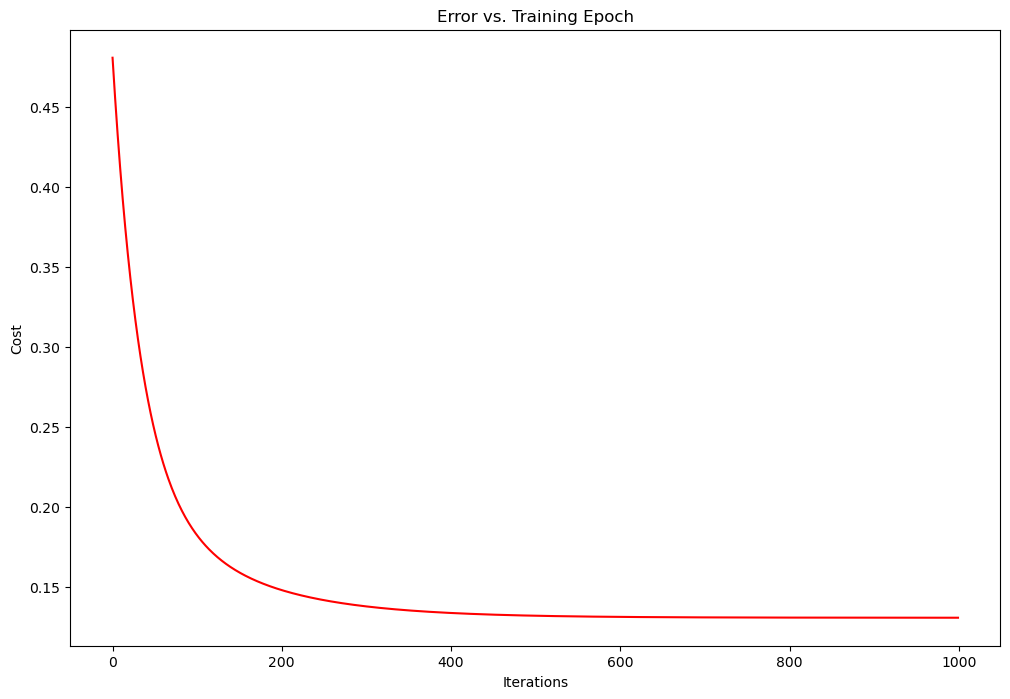

In [244]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()